# Introduction to pandas

## 1. Basic Data Structures in pandas

In this section I'll introduce the two main data structures in pandas: `DataFrame` and `Series`. I'll also show how you can perform some very basic data exploration and analysis of those structures.

### 1.1. Preliminaries 

If you are new to Python, then this first step might seem strange to you. When you have Python installed on your computer, it comes with a standard library of code packages that are specialized to perform certain tasks more efficiently than if you were to write the code "from scratch" for every task you want to perform. In addition to the standard library, there are many other packages (a.k.a. modules) that are easily downloadable from the internet. Indeed, this is exacly what pandas is... a Python package used for data analysis that is not in Python's standard library.

Python has a small subset of [built-in functions](https://docs.python.org/3/library/functions.html) that are always available to you. However, if you want to use the functionality from one of those additional modules, whether they are from the standard library or downloaded from the internet, you must `import` it before you use it. As such, the first thing that most people like to do at the top of their code is to import the modules that they plan to use. If you forget one or simply decide later on to use one not already imported, then you can do so at any point in the code.

In this next cell we `import` the modules necessary for this notebook. Some coders like to refer to this as a "preamble," but I'm not sure that is standard. For reasons beyond the scope of this tutorial, it is also common for users to set certain parameters in the preamble. For example, below I set a few parameters that make the figures look a bit nicer. In addition to the imports and figure settings, there is also what we call a [magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html): `%matplotlib inline`. This command simply tells the plotting module to produce the figures inline in the notebook.

In [1]:
# Any text on any line that is preceded by a '#' is simply a comment

# Most of the lines below will be part of our standard preamble.

%matplotlib inline

import pandas as pd # this is why we're here... to learn pandas
import numpy as np # fundamental package for scientific computing 
import matplotlib.pyplot as plt # this package makes the plots
import requests # this package assists with downloading data from the internet
import json # this package helps Python work with JSON objects

plt.style.use('ggplot') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

**Note**: You probably noticed the use of the word "as" in those `import` statements above. This simply assigns a shorthand label to the package being imported. For example, when we want to use a function from pandas, we can refer to the module using `pd` instead of `pandas`. 

### 1.2. Load a dataset

We can't really do much without some data to work with, so first let's load a dataset into the workspace. One of the most widely used methods for storing data is in a file type called "Comma Separated Values" or CSV. A CSV file is simply a text file containing data. The name itself is kind of a misnomer, since the data in a CSV doesn't have to be separtated by a comma. It can be separated by a semicolon or tab or space or some other symbol, called a delimiter. As long as you know what the delimeter is, pandas will have no problem loading in the dataset. By default, pandas will assume the delimeter is a comma.

The dataset I want to open is `../data/Meteorite_Landings.csv`. Just in case you're not familiar with that syntax, `..` means to go up (back) one level in the directory tree. In that directory (folder) you'll see a directory called `data`. If you navigate into the `data` directory, you'll find the CSV file mentioned. The function I'll use to load (*read*) the CSV file is called `read_csv()`.

---

*The original source of this dataset is [NASA's open data website](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh), but I have simply taken the dataset from Stefanie Molin's pandas workshop, which I reference in the [README](../README.md) file of this tutorial.*

---

In [2]:
meteorites = pd.read_csv('../data/Meteorite_Landings.csv')

And just like that, we have "loaded" all of the data from that CSV file into our workspace. For aesthetic reasons, Python doesn't make a habit of printing things to the screen unless you ask it to do so, that's why you don't see anything. But rest assured that the data contained in that CSV file now stored in the variable `meteorites`. Unless we modify it or delete it, we will have access to all that data while we are working in this notebook. Now let's learn how the data are arranged in this Python object and the specific data structures associated with it.

### 1.3. The `DataFrame` and `Series` structures

#### 1.3.1. `DataFrame`

The first thing we should do is to simply look at the data. If you want to do so, you can open up the CSV file itself in a text editor. But the best way to view the data is right here in this notebook. Let's take a look at the top (a.k.a., head) of the dataset. We'll use the `.head()` method to do this. We can put a positive integer inside the () to tell Python how many rows (sometimes called "records") from the head of the dataset to print out. We don't have to do this; by default, it will print out five records.

In [3]:
meteorites.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [4]:
# To see what kind of oject we have
type(meteorites)

pandas.core.frame.DataFrame

---

It turns out that this object we created (called `meteorites`) is a pandas `DataFrame`. You can think of a `DataFrame` as a table of data, like something you'd create in a spreadsheet. It has two dimensions. Each row is one record of data. Each record consists of ten "pieces" (sometimes called *features*) of data. If we compare the text in the actual CSV file, we can see that the first row of data contains the labels for the various columns (features) of the dataset. 

Notice that the first column has no label and is a list of integers from 0 to 4. This is the `index` of the `DataFrame`. These values are not actually in the CSV file... go take a look. Each record in a `DataFrame` needs to have a unique identifier; we accomplish that using an `index`. **Note**: an `index` doesn't have to be sequential integers. It can be whatever we want it to be, but integers and dates and timestamps are very common. 

Also, notice that the first record has an index of 0, not 1. If you are not familiar with computer science, it may surprise you that we like to start counting with the integer *ZERO*, not with *ONE*. Let's not get into the reason why.

---

**How big is it?** If we want to see the size of the `DataFrame`, we have several options. If we just want to know how many records there are, we can use the `len()` built-in function for "length". If we want to know the shape, i.e., size in all dimensions, we use the `.shape` attribute of the pandas `DataFrame` object.

In [5]:
# This will show us the length of the DataFrame, i.e., the number of records
len(meteorites)

45716

In [6]:
# This will show us the entire shape of the DataFrame
meteorites.shape

(45716, 10)

#### 1.3.2. `Series`

Each column in the `DataFrame` is a pandas `Series`. A `Series` is a one dimensional collection of data, like a vector of data (if the mathematical concept of "vector" means anything to you).

In [7]:
# grab onto one of those columns and give it a label
r_class = meteorites.recclass

# print this new object to the screen
print(r_class)

# print the type of this object
type(r_class)

0                          L5
1                          H6
2                         EH4
3                 Acapulcoite
4                          L6
                 ...         
45711                 Eucrite
45712    Pallasite, ungrouped
45713                      H4
45714                      L6
45715                    L3.7
Name: recclass, Length: 45716, dtype: object


pandas.core.series.Series

---

Notice that it did not print out all 45716 entries in this `Series`. By default, the behavior of the `print()` function in this notebook is designed so that it won't print out very large amounts of data unless you force it to do so. Even then, there are limits to the amount of data that this notebook will print to the screen when prompted to do so.

Also notice that this `Series` no longer has the column label "recclass" from the `DataFrame` attached to it. This is because a pandas `Series` really does behave like a one-dimensional array of values. We can even "grab on to" one or more of the values by integer reference... just like we can with an array.

In [8]:
# print out the first element
r_class[0]

'L5'

In [9]:
# print out the first 20 elements
r_class[0:20]

0               L5
1               H6
2              EH4
3      Acapulcoite
4               L6
5              EH4
6            LL3-6
7               H5
8               L6
9                L
10    Diogenite-pm
11              L6
12         Unknown
13              L6
14              H4
15               H
16       Iron, IVA
17          CR2-an
18             LL5
19             CI1
Name: recclass, dtype: object

---

There's actually another way to refer to a specific column that some people prefer to use.

In [10]:
# let's get the "name" column
name = meteorites['name']

# print the column
print(name)

# print the type (should be a Series object)
type(name)

0            Aachen
1            Aarhus
2              Abee
3          Acapulco
4           Achiras
            ...    
45711    Zillah 002
45712        Zinder
45713          Zlin
45714     Zubkovsky
45715    Zulu Queen
Name: name, Length: 45716, dtype: object


pandas.core.series.Series

#### 1.3.3. Wrap-up

So, this `DataFrame` of ours is simply ten `Series` of data appended together. If needed, we can create a list of column labels from our `DataFrame`.

In [11]:
# Get the column labels
cols = meteorites.columns
print(cols)

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')


In [12]:
# print out the first column label
cols[0]

'name'

In [13]:
# print out the first three column labels
cols[0:3]

Index(['name', 'id', 'nametype'], dtype='object')

In addition, we can also get the indices of any `DataFrame` and store them in a variable. In this case, doing so would hardly seem necessary since the indices are sequential integers. Nevertheless, if the indices were of some other data type, you might want or need that `index` stored in some variable to be used later.

In [14]:
# Get the indices
idx = meteorites.index
print(idx)

RangeIndex(start=0, stop=45716, step=1)


In [15]:
# print out the 43rd index (remember... we start counting at zero!)
idx[42]

42

In [16]:
# print out the 9th through 18th indices
idx[8:18]

RangeIndex(start=8, stop=18, step=1)

---

If the way Python "printed" these indices (as a `RangeIndex()` object) seems weird to you, that's understandable. To explain why would push us too far afield for the scope of this tutorial. To convince you that the last command really did retrieve the 9th through the 18th indices, we can simply loop over this `RangeIndex()` object and print out each value one-by-one on its own line. Keep in mind that the actual numerical values of these idices should begin with 8 and end with 17, due to the zero indexing convention.

In [17]:
for value in idx[8:18]:
    print(value)

8
9
10
11
12
13
14
15
16
17


---

Another thing we can do while exploting the data is to print out a basic information summary of the `DataFrame`.

In [18]:
meteorites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  object 
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


# 2. Basic Plotting

pandas uses the matplotlib module to do all of its built-in plotting. This is not a tutorial on using matplotlib, so we won't explore the vast graphical capabilities of this module. Learning matplotlib is deserving of its own tutorial.

## 2.1. Plot a column

Let's not forget what our dataset (`DataFrame`) looks like.

In [19]:
meteorites.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


Let's plot the "mass (g)" column. Using matplotlib, a basic plot of this column is trivial. Now, because this column label actually has a space in the label, we cannot use the "dot" reference convention `meteorites.mass (g)` to refer to the column. We must use the "bracket" reference convention `meteorites['mass (g)']` to refer to the column. It would have been a good idea to "clean up" the column labels after loading in the dataset, but we can worry about that another day.

<AxesSubplot:>

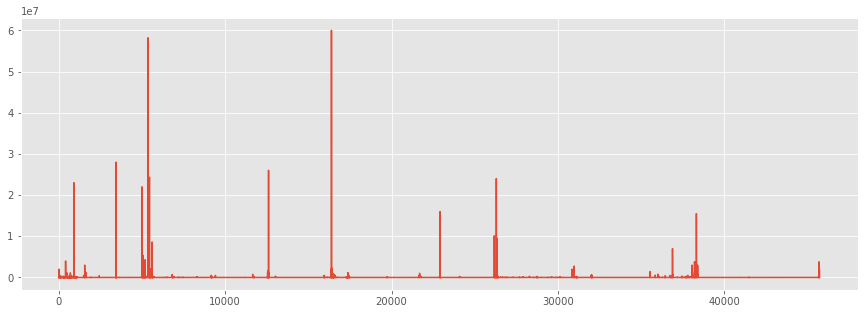

In [20]:
meteorites['mass (g)'].plot()

As you can see, it's a fairly nice looking, yet basic, plot of the data in that column. It does not include a title, a legend, or axes labels. All of these attributes (and many more) can be controlled with various commands. I'll just explore a few of them.

Let's begin with something as simple as changing the color of the plotted lines.

<AxesSubplot:>

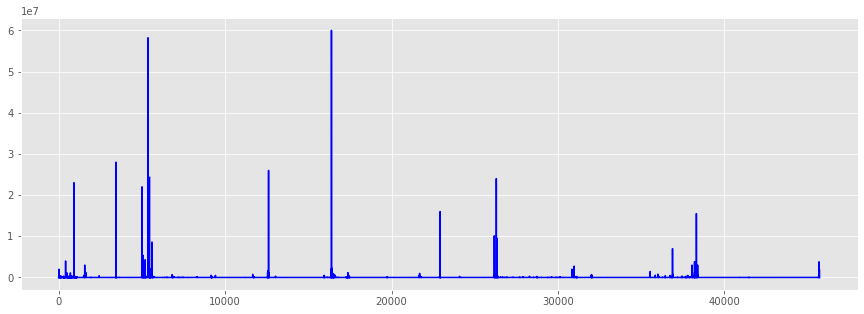

In [21]:
meteorites['mass (g)'].plot(color='blue')

---

Let's run this command again. Now we'll add on labels for both axes, a title, and change the font size.

<AxesSubplot:title={'center':'METEORITE MASS'}, xlabel='index', ylabel='grams'>

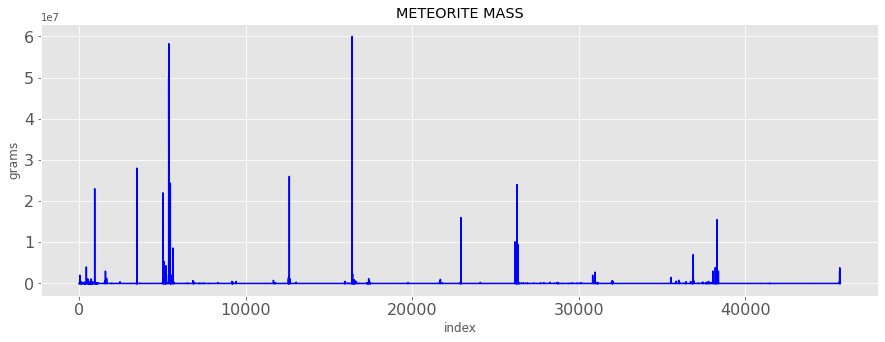

In [22]:
meteorites['mass (g)'].plot(color='blue', xlabel='index', ylabel='grams', title='METEORITE MASS', fontsize=16)

One thing we notice is that everytime we plot a figure Python likes to print out an `<AxesSubplot:>` output. This is not terribly annoying, but we can suppress it by adding a semicolon at the end of our line of code.

Another thing we notice is that the `fontsize=16` parameter seems to only have affected the axes tick labels, not the axes labels themselves, nor the title. We can fix all of this. We'll also add a legend, although it is hardly necessary when plotting only one collection of data.

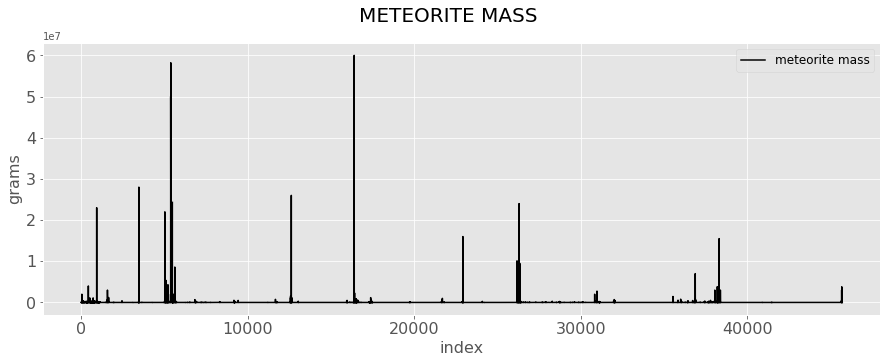

In [23]:
# save this column as a Series, so we refer to it more easily
mass = meteorites['mass (g)']

# create a figure and axes object
fig, ax = plt.subplots()

# plot the data in black and set the tick label font size and provide a text label for the legend
mass.plot(color='black', fontsize=16, label='meteorite mass');

# set the font sizes for the axes labels, title, and legend, and force the figure to show the legend
plt.suptitle('METEORITE MASS', fontsize=20);
plt.xlabel('index', fontsize=16);
plt.ylabel('grams', fontsize=16);
plt.legend(fontsize=12);

One thing that we notice about this plot is that it's really only useful for seeing the frequency of meteorites that have a mass on the order of a few ten million grams, as indicated by the notation `1e7` at the top of the $y$-axis.

Why don't we define small meteorites to be all meteorites with a mass less than or equal to 50 kilograms. Then we can plot the masses of those small meteorites.

In [24]:
# create a new DataFrame having only the rows of the original in which the mass of the meteorite meets specification
small_meteorites = meteorites[mass <= 50000]

# print the bottom (a.k.a. tail) 10 records in the dataset
small_meteorites.tail(10)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
45702,Zelfana,31353,Valid,L5,1058.0,Found,01/01/2002 12:00:00 AM,32.15833,4.63333,"(32.15833, 4.63333)"
45703,Zenda,30400,Valid,"Iron, IAB complex",3700.0,Found,01/01/1955 12:00:00 AM,42.51333,-88.48944,"(42.51333, -88.48944)"
45704,Zerga,30402,Valid,LL6,76.0,Found,01/01/1973 12:00:00 AM,20.25000,-12.68333,"(20.25, -12.68333)"
45706,Zerkaly,31354,Valid,H5,16000.0,Found,01/01/1956 12:00:00 AM,52.13333,81.96667,"(52.13333, 81.96667)"
45710,Zillah 001,31355,Valid,L6,1475.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)"
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,01/01/1976 12:00:00 AM,33.98333,-115.68333,"(33.98333, -115.68333)"


Now we can simply copy/paste the plotting code above and graph the masses of these small meteorites.

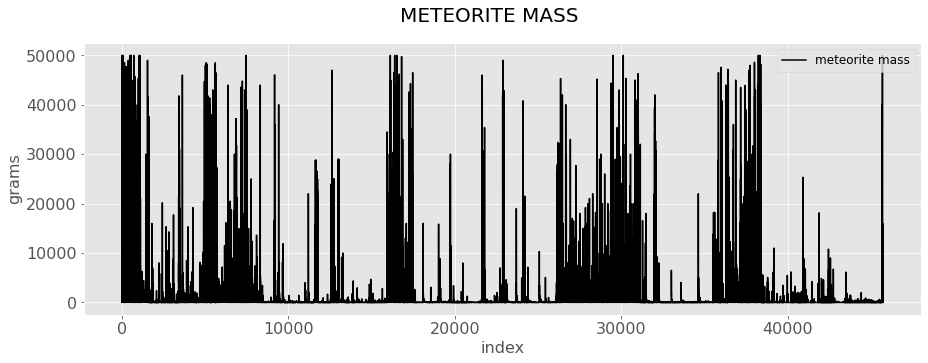

In [25]:
small_mass = small_meteorites['mass (g)']

fig, ax = plt.subplots()
small_mass.plot(color='black', fontsize=16, label='meteorite mass');
plt.suptitle('METEORITE MASS', fontsize=20);
plt.xlabel('index', fontsize=16);
plt.ylabel('grams', fontsize=16);
plt.legend(fontsize=12);

## 2.2. Plot multiple columns

It's also quite easy to plot multiple columns on the same graph. However, with this particular dataset it doesn't make sense to do so. It makes sense to graph the masses of the meteorites, but not the meteorite id numbers. It also doesn't make sense to graph the latitudes and longitudes of the geographical locations where the meteorites hit Earth. It might make sense to make some other kind of visual graph or visual aid of the locations but not really in line graph, which is what I'm demonstrating now.

Nevertheless, I'll show the syntax to graph multiple columns. Let's begin with the basic plot of all columns that have a numerical data type. It really is quite simple.

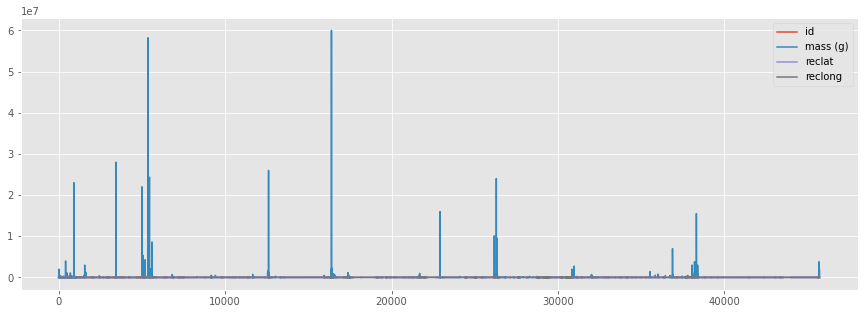

In [26]:
meteorites.plot();

Of course we cannot tell much from the graph since the scales are all so different for these four columns. The id numbers are on the order of tens of thousands. The (large) meterite masses are on the order of tens of millions. The latitudes and longitudes take on positive/negative values with absolute values less than 180.

How about we just take a quick look at the latitudes and longitudes in their own graph?

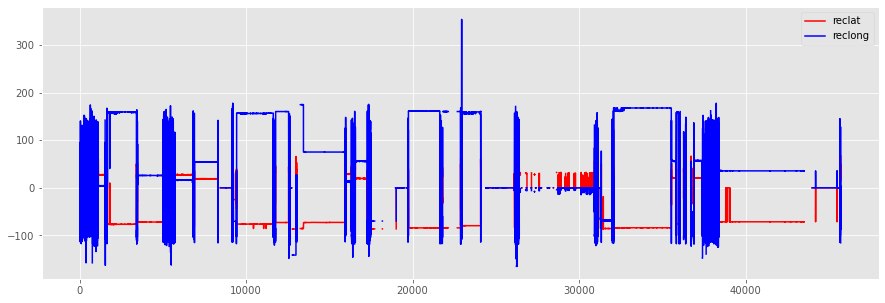

In [27]:
meteorites[['reclat', 'reclong']].plot(color=('red', 'blue'));

This plot really isn't very useful but it does illustrate the basic syntax for plotting mulitple `DataFrame` columns in the same graph. With some datasets this capability is quite useful, and we will revisit it on a different dataset later on.

Why don't we take a quik look at a better (still not the best) way to visualize latitude/longitude data?

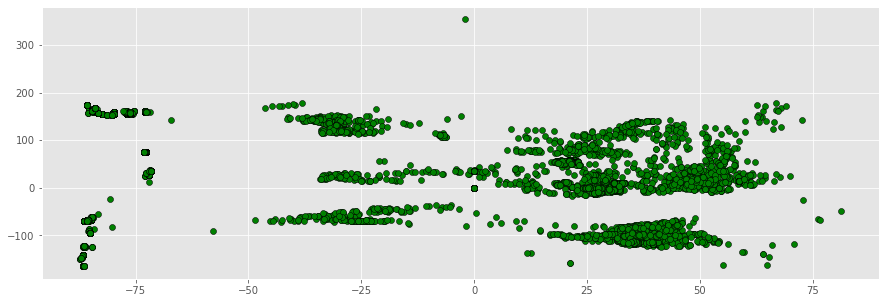

In [28]:
# define two Series that we'll use for plotting
lat = meteorites.reclat
lon = meteorites.reclong

# we'll make a scatter plot of the data using green circles with black edges
plt.scatter(lat, lon, marker='o', color='green', edgecolors='black');

Now this visual is **MUCH** better than the previous one. But I think we can do just a bit better! If you think about the way we visualize maps, you'll recall that we prefer to create them with the longitude along the horizontal and the latitude along the vertial. This appeals to our human notion of north being UP and south being DOWN. So, let's create the plot again, switching the places of `lat` and `lon`.

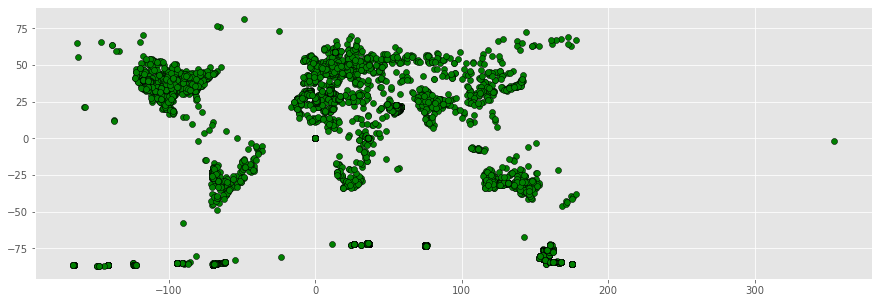

In [29]:
plt.scatter(lon, lat, marker='o', color='green', edgecolors='black');

**WOW** now that visual looks familiar to us, right? Well, one thing I notice is the point way out on the right. This is a data value that has a mislabeled longitude. We can simply ignore it or re-plot the data and restrict the $x$-axis limits.

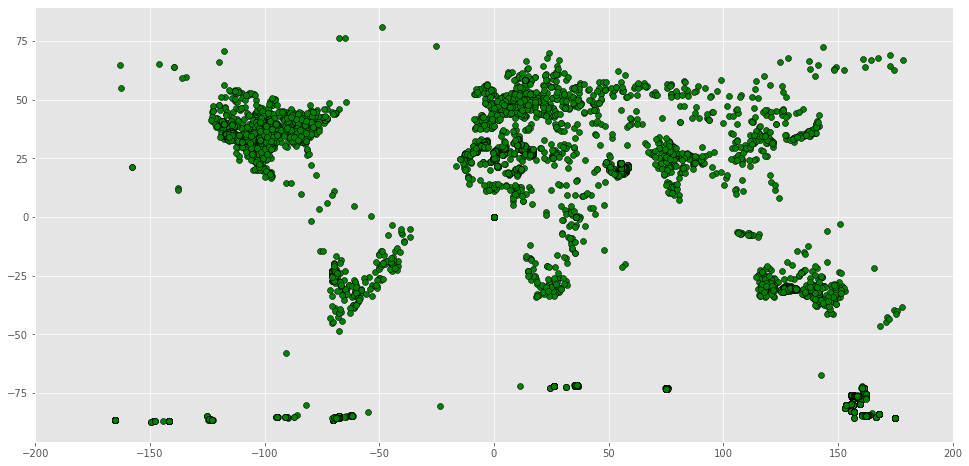

In [31]:
fig, ax = plt.subplots(figsize=(16.44, 8))
plt.scatter(lon, lat, marker='o', color='green', edgecolors='black');
plt.xlim([-200, 200]);

That looks a lot better! The only thing that might make it look nicer is to graph it on top of an outline of Earth's land masses.

Although it's unrelated to pandas and the reasons for giving this tutorial, it occurred to me that scientists who study meteorites only get to study a small portion of the ones that actually hit Earth... and this plot illustrates that point. The reason is quite simple... most of Earth is covered in water, and scientists don't find and collect data on meteorites that fall in the oceans. And apparently it's also difficult to find and study the ones that fall in remote locations... Alaska, upper 90% of Canada, Greenland, the jungles of sub-Saharan Africa, and the Amazon rainforest!

# 3. Downloading Data from the Internet

So far we have done some very basic data exploration and plotting with a dataset we imported from a CSV file. There are many other file types that pandas can import data from, but Python also has the capability to download data directly from the internet. If you think about how you might download a file from the internet, you might wonder why one might want to write code that does the job. Afterall, all you have to do is navigate to a website that has the data you want and click a button. Then (depending on the size of the file) after a few seconds up to a few minutes the file is on your computer. You can move it to any directory you want and do whatever you want to do with the file... open it up in [RStudio](https://www.rstudio.com/) to do a regression or import it into a Python script to do machine learning. But there are plenty of reasons you might want to automate the downloading process:
1. You want/need to download many similar files and don't want to waste the time required to click and wait, which could take hours or days.
2. The file size is so large that in order to do whatever you want to do with it would require you to load a prohibitively large file into the RAM on your personal computer, so you decide to work on a large remote computer.
3. Perhaps the file size itself is not prohibitively large, but the analysis that you want/need to do with the data is incredibly time intensive and you don't want to tie up your personal computer for hours or days, so you want to use a remote computer.
4. The data analysis you are doing involves using data that is regularly being updated online, so it makes more sense to automate the retrieval of the data.

Whatever the reason may be, let's delve into the process. It is more complicated than a one-line read/import statement.

## 3.1. Download Weather Data

In the first two sections, we looked at meteorite data that was downloaded from [NASA's open data website](https://data.nasa.gov/), but there are plenty of other curated data repositories online. Here are four others:
1. The [NYC open data website](https://opendata.cityofnewyork.us/), which maintains thousands of datasets about all things New York City.
2. [NOAA's open data website](https://www.ncdc.noaa.gov/cdo-web/), which maintains vast amounts of global weather data at the National Climatic Data Center.
3. The [NCBI open data website](https://www.ncbi.nlm.nih.gov/datasets/), which is sponsored by the National Institutes of Health and maintains vast amounts of genomic data.
4. [CDC's open data website](https://data.cdc.gov/), which houses more public health datasets than you could ever dream that existed.

There are so many open data portals online today that it is practically impossible to find them all.

You might think the key to downloading data from the internet is simply knowing the URL of the webpage and writing a one-line Python command to get that data. It turns out that there is not a *one-size-fits-all* methodolgy for retrieving data online. The key to doing this is undstanding (at least at a surface level) how Python interacts with webpages to retrieve webpage information and convert it into human understandable/usable text, e.g., a CSV file.

---

As a first example let's explore item number 2. listed above. We are going to use the [requests](https://requests.readthedocs.io/en/latest/) module that we imported into this notebook in our first code cell above.

We begin by defining a URL template that we'll use to interact with the data on NOAA's data website.

In [32]:
url_template = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid={data_id}&datatypeid={d_type}&'\
               'limit={max_items}&stationid={station_id}&startdate={start_date}&enddate={end_date}'

**Notes**:
1. The first think you probably notice is that the URL is on two lines. This is purely aesthetic. The URL is so long that it exceeds the cell width of this notebook. This is common in programming. You can simply put the entire URL string on a single line, and to view it all you would simply scroll back-and-forth or change your font to be extrememly small. I don't like either of those options, so I write the URL string on two lines. In Python, when you write a single string across multiple lines, all you need to do is to place a `\` character at each line break.
2. The second thing you may (or may not) notice is the inclusion of parameter placeholder labels inside braces `{}` and following equal symbols `=`. These are simply variable names that we will assign values to below. You can place actual values for these variables in the URL template, but doing so kind of spoils the *automated* nature of this lesson.

---

These parameters are fairly self-explanatory, but if you really want to get into the details, you must consult the [online documentation](https://www.ncdc.noaa.gov/cdo-web/webservices/v2#data).

Obviously we'll need to provide a uniquie identifier that tells Python which dataset you want to download. We'll have to manually find this `data_id` value by exploring NOAA's data website. I have already done this. We're going to use the [Global Historical Climatology Network - Daily](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html) which uses the unique identification `GHCND`.

In [33]:
data_id = 'GHCND' # Global Historical Climatology Network - Daily

Next, we need to identify the specific data type(s) that we want to download. If you don't include this parameter in the URL template, all data types will be downloaded. For simplicity in this first example, let's just download the *maximum daily temperature* for each day in the dataset. The parameter value associated with this is `TMAX`. For a comprehensive list of all available data types in this dataset, you may consult the online documentation mentioned above or browse the [GHCND documentation](../GHCND_documentation.pdf) document included in this tutorial. If you want to download multiple data types (but not all of them), you simply make a "chain" of data types, using an ampersand `&` as a separator.

In [34]:
d_type = 'TMAX' # maximum daily temperature

The `max_items` parameter simply communicates the maximum number of individual datum values that you want to download. Currently, the largest value you can use is 1000. The default is 25. Note that if you request two data types from the same day, it counts as 2 toward this limit, not 1. 

In [35]:
max_items = 1000 # maximum number of results to download

The `station_id` parameter indicates the weather station you are requesting data from. Obviously the weather in Nome, AK is not the same as the weather in Pittsburgh, PA. Moreover, some cities have multiple weather stations to select from. And, some weather stations aren't really in a town/city at all. But all of them have a unique identifier. I am going to collect data from a weather station along the Ohio River, just downstream from Pittsburgh, PA at the Emsworth Dam. It's unique identifier is `GHCND:USC00362574`.

In [36]:
station_id = 'GHCND:USC00362574' # EMSWORTH L D OHIO RIVER, PA US

I believe that the `start_date` and `end_date` parameters are self-explanatory. Let's download the data for the whole month of June 2022. The date format is YYYY-MM-DD.

In [37]:
start_date = '2022-06-01'
end_date = '2022-06-30'

We're almost there! Okay... so in order for Python to communicate in the best way possible with external servers (websites), it helps if Python "tells" the website a little bit of information about your specific web browser. This information will facilitate Python's interaction with the web content. Specifically, we want Python to convey our computer's "User-Agent". You probably don't know your computer's user agent, but it's easy enough to find. Google search "my user agent" and Google will tell you what it is. It will be a string (text) that describes your operating system and exact web browser version. Here is mine:

In [38]:
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) '\
             'AppleWebKit/537.36 (KHTML, like Gecko) '\
             'Chrome/103.0.0.0 Safari/537.36' # My HTTP user agent

**Note**: Since it's rather long, I like to write it across several lines, but you don't need to do that if you don't want to.

---

One last thing is needed in order to make this all work smoothly. All of these big, curated data websites experience a large volume of data download requests. To limit access to their data servers, data portals employ the use of tokens. A token is kind of like a password that specifically identifies you as the person downloading the data. Tokens are not required with all data portals, but they are required for NOAA's website. For data portals that don't require them, if you request data without a token, the website will not prioritize your request. Long story short... you may wait a good bit of time until the website decides to start communicating with you. In fact, your request may even "time out" if the server is busy and you haven't provided a token. 

Getting a token to download NOAA data is free, quick, and easy. Visit [this](https://www.ncdc.noaa.gov/cdo-web/token) webpage on the NOAA website and enter your email address. If you don't want to get a token right now, then that is fine. You can just watch what we do. 

The token below is my personal token, please do not use it.

In [39]:
token = 'JKcyAfUrhkZwokgQQXYgVwlNiajndGlG' # My personal access token

We are finally ready to make the download request. As I mentioned above, we are going to use the (aptly named) Python module "requests". In our request, we'll provide our token and user agent in HTTP header.

In [44]:
# the line below converts the URL template into the actual URL by supplying the values of the parameters
url = url_template.format(data_id=data_id, d_type=d_type, max_items=max_items, station_id=station_id, 
                          start_date=start_date, end_date=end_date)

# this is where we actually make the request to NOAA and save whatever comes back in the variable 'response'
response = requests.get(url, headers={'User-Agent': user_agent, 'Token': token})

Okay... so what kind of Python object is this `response`? Better yet, what does it look like? Let's see.

In [41]:
type(response)

requests.models.Response

Well, it's a `Response` object... whatever that means. Let's print it and see what it looks like.

In [45]:
print(response)

<Response [200]>


That didn't help either. Trying to print the response is just as cryptic as printing what type of object it is. Whenever this happens, one thing I always do is to check and see if this object is "iterable" (not irritable.. although some Python objects might make YOU this way) by attempting to loop over it and printing each item in it.

In [47]:
k = 1
for item in response:
    print(k, item)
    k += 1

1 b'{"metadata":{"resultset":{"offset":1,"count":28,"limit":1000}},"results":[{"date":"2022-06-01T00:00:00","datatype":"TMAX","stati'
2 b'on":"GHCND:USC00362574","attributes":",,H,0600","value":317},{"date":"2022-06-03T00:00:00","datatype":"TMAX","station":"GHCND:US'
3 b'C00362574","attributes":",,H,0600","value":222},{"date":"2022-06-04T00:00:00","datatype":"TMAX","station":"GHCND:USC00362574","a'
4 b'ttributes":",,H,0600","value":250},{"date":"2022-06-05T00:00:00","datatype":"TMAX","station":"GHCND:USC00362574","attributes":",'
5 b',H,0600","value":244},{"date":"2022-06-06T00:00:00","datatype":"TMAX","station":"GHCND:USC00362574","attributes":",,H,0600","val'
6 b'ue":272},{"date":"2022-06-07T00:00:00","datatype":"TMAX","station":"GHCND:USC00362574","attributes":",,H,0600","value":256},{"da'
7 b'te":"2022-06-08T00:00:00","datatype":"TMAX","station":"GHCND:USC00362574","attributes":",,H,0600","value":211},{"date":"2022-06-'
8 b'09T00:00:00","datatype":"TMAX","station":"GHCND:USC0036257

There are 26 items in this `Response` object. Upon close inspection, it's clear that each "item" in this response is simply a line of uniform length... like a line in a text file where the text wraps to the next line after a certain character count is reached. Just take a look at the line break between the first two lines. The word "station" has been broken into "stati" on line 1 and "on" on line 2.

The data are not so useful in this form. Luckily, Python's json module has no problem converting this mess into something quite a bit nicer.

In [48]:
data = json.loads(response.text) # convert the Response object to a Python dictionary

In [49]:
type(data)

dict

This means that we have converted the response text into a Python dictionary, a.k.a., `dict`. Let's print it and look at it.

In [50]:
data

{'metadata': {'resultset': {'offset': 1, 'count': 28, 'limit': 1000}},
 'results': [{'date': '2022-06-01T00:00:00',
   'datatype': 'TMAX',
   'station': 'GHCND:USC00362574',
   'attributes': ',,H,0600',
   'value': 317},
  {'date': '2022-06-03T00:00:00',
   'datatype': 'TMAX',
   'station': 'GHCND:USC00362574',
   'attributes': ',,H,0600',
   'value': 222},
  {'date': '2022-06-04T00:00:00',
   'datatype': 'TMAX',
   'station': 'GHCND:USC00362574',
   'attributes': ',,H,0600',
   'value': 250},
  {'date': '2022-06-05T00:00:00',
   'datatype': 'TMAX',
   'station': 'GHCND:USC00362574',
   'attributes': ',,H,0600',
   'value': 244},
  {'date': '2022-06-06T00:00:00',
   'datatype': 'TMAX',
   'station': 'GHCND:USC00362574',
   'attributes': ',,H,0600',
   'value': 272},
  {'date': '2022-06-07T00:00:00',
   'datatype': 'TMAX',
   'station': 'GHCND:USC00362574',
   'attributes': ',,H,0600',
   'value': 256},
  {'date': '2022-06-08T00:00:00',
   'datatype': 'TMAX',
   'station': 'GHCND:USC003

Now we are getting somewhere. These data are almost in a user-friendly format. 

The dictionary `data` has two keys: `'metadata'` and `'results'`. `'results'` is a list of dictionaries, where each dictionary reprsents a single data entry having the following keys: `'date'`, `'datatype'`, `'station'`, `'attributes'`, and `'value'`. The `'date'` includes the defualt time information, which we will strip away. The temperature value, i.e., `'TMAX'`, is in units of degrees Celsius times ten, so we will have to fix that.

First, let's just convert the results into a pandas `DataFrame` and take a look at what we have.

In [51]:
weather_scraped_raw = pd.DataFrame(data['results'])
weather_scraped_raw.head() # look at top 5 records

,date,datatype,station,attributes,value
0,2022-06-01T00:00:00,TMAX,GHCND:USC00362574,",,H,0600",317
1,2022-06-03T00:00:00,TMAX,GHCND:USC00362574,",,H,0600",222
2,2022-06-04T00:00:00,TMAX,GHCND:USC00362574,",,H,0600",250
3,2022-06-05T00:00:00,TMAX,GHCND:USC00362574,",,H,0600",244
4,2022-06-06T00:00:00,TMAX,GHCND:USC00362574,",,H,0600",272


**NICE!** Well, now we are on the right track. It now appears that we have pretty much what we wanted, the maximum daily temperature for the month of June 2022 at that weather station just outside Pittsburgh, PA.

But, we can make our `DataFrame` a little bit nicer. One way to fix up this `DataFrame` is to iterate over each item in it and build the components of a new (better) `DataFrame`. The fastest way to iterate over a pandas `DataFrame` is through what is called vectorization. We'll use the list of dictionaries stored in the variable `data['results']`.

---

The little bit of code below will loop over each record in the downloaded results and create a Python dictionary with more user-friendly column labels (*the dictionary keys*). Most of this script is very self-explanatory. The one item that may seem weird is the one where I convert the temperature to something that makes sense to us (Americans). Recall from above that (*by default*) the temperature downloaded from NOAA is in units of degrees Celsius times ten. I simply convert this into degrees Fahrenheit.

In [52]:
temp = []
for row in data['results']:
    date = row['date'][0:10]
    station = row['station'][6::]
    tmax = round((row['value']/10)*1.8 + 32, 2)
    temp.append({'DATE': date, 'STATION': station, 'TMAX': tmax, 'TMAX_ATTRIBUTES': row['attributes']})

Now we can use built-in pandas functionality to convert this LIST of DICTIONARIES (*each one corresponding to an individual record*) into a `DataFrame`. Instead of letting Python choose the default index of non-negative integers, I decided to make the date the index of my `DataFrame`. I think this makes the most sense.

In [53]:
weather_scraped = pd.DataFrame.from_records(temp, index='DATE')
weather_scraped.head()

,STATION,TMAX,TMAX_ATTRIBUTES
DATE,,,
2022-06-01,USC00362574,89.06,",,H,0600"
2022-06-03,USC00362574,71.96,",,H,0600"
2022-06-04,USC00362574,77.00,",,H,0600"
2022-06-05,USC00362574,75.92,",,H,0600"
2022-06-06,USC00362574,80.96,",,H,0600"


And there you have it! It must all seem incredibly complex the first time you see this, but with experience all of the little necessary tasks will become second nature to you.

So... let's plot `TMAX`.

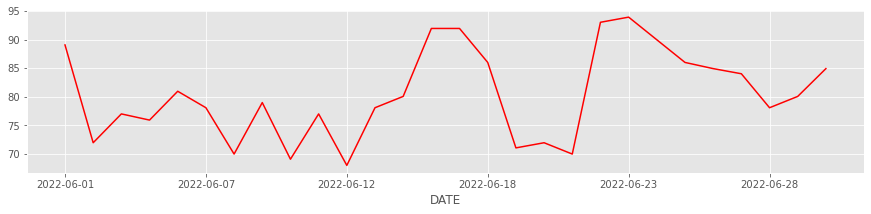

In [54]:
weather_scraped['TMAX'].plot(figsize=(15, 3), color='red');

When pandas uses matplotlib to make graphs of a column in a `DataFrame`, it always uses the index as the $x$-axis tick labels, unless you force it to use something else. This is another reason why using the date as the index is a good idea.

---

Let's make another request. This time we'll request two additional pieces of data on each day: minimum temperature `TMIN` and temperature at time of observation `TOBS`. We'll only need to modify the the `d_type` parameter before making the request. Then, once we get the response, we'll need a modified version of the code that converts the raw data into the nicer `DataFrame`. However, this modification is rather sophisticated for a novice Python-er in a pandas tutorial. Hence, I have saved the function in the the Python script [helper.py](../helper.py). I'll just import it and use it in this tutorial.

In [57]:
from helper import clean_df

In [61]:
d_type = 'TMAX&datatypeid=TMIN&datatypeid=TOBS' # maximum daily temp & minimum daily temp & temperature at time of observation

url = url_template.format(data_id=data_id, d_type=d_type, max_items=max_items, station_id=station_id, 
                          start_date=start_date, end_date=end_date)
response = requests.get(url, headers={'User-Agent': user_agent, 'Token': token})
data = json.loads(response.text)
weather_scraped_raw = pd.DataFrame(data['results'])
weather_scraped = clean_df(weather_scraped_raw)

In [62]:
weather_scraped.head(10)

,STATION,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES
DATE,,,,,,,
2022-06-01,USC00362574,89.06,",,H,0600",62.96,",,H,0600",69.98,",,H,0600"
2022-06-03,USC00362574,71.96,",,H,0600",51.98,",,H,0600",51.98,",,H,0600"
2022-06-04,USC00362574,77.00,",,H,0600",51.98,",,H,0600",55.94,",,H,0600"
2022-06-05,USC00362574,75.92,",,H,0600",53.06,",,H,0600",53.96,",,H,0600"
2022-06-06,USC00362574,80.96,",,H,0600",53.06,",,H,0600",53.96,",,H,0600"
2022-06-07,USC00362574,78.08,",,H,0600",53.96,",,H,0600",53.96,",,H,0600"
2022-06-08,USC00362574,69.98,",,H,0600",53.06,",,H,0600",53.06,",,H,0600"
2022-06-09,USC00362574,78.98,",,H,0600",53.06,",,H,0600",60.08,",,H,0600"
2022-06-10,USC00362574,69.08,",,H,0600",55.04,",,H,0600",55.94,",,H,0600"


That looks pretty good to me! Let's plot all three temperatures on the same graph.

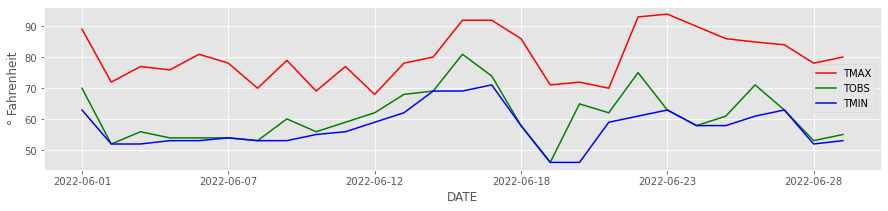

In [63]:
weather_scraped[['TMAX', 'TOBS', 'TMIN']].plot(figsize=(15, 3), color=('red', 'green', 'blue'), ylabel='\xb0 Fahrenheit');

Even though it took only about one second or so to download the data, there's no need to download it again later on. We might as well save this nice looking `DataFrame` to a CSV file that we can open up at a later time and do whatever we want to do with it.

In [64]:
weather_scraped.to_csv('../data/wx_pitt_pa_jun22.csv')